# Tagging words

In [1]:
text = open('the-zen-of-python.txt','r').read()

print(text)

import nltk
from nltk.tokenize import word_tokenize

text_tokens = word_tokenize(text)

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one, and preferably only one, obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than right now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea, let's do more of those!


In [2]:
fd = nltk.FreqDist(text_tokens)

print(fd.most_common(5))

print(fd.tabulate(5))

[('.', 18), ('is', 10), ('better', 8), ('than', 8), (',', 6)]
     .     is better   than      , 
    18     10      8      8      6 
None


## Types of tagging

#### POS tagging

In [3]:
import nltk 

text_POS_tag = nltk.pos_tag(text_tokens, lang='eng')

print(text_POS_tag)

[('Beautiful', 'NNP'), ('is', 'VBZ'), ('better', 'JJR'), ('than', 'IN'), ('ugly', 'RB'), ('.', '.'), ('Explicit', 'NNP'), ('is', 'VBZ'), ('better', 'JJR'), ('than', 'IN'), ('implicit', 'NN'), ('.', '.'), ('Simple', 'NNP'), ('is', 'VBZ'), ('better', 'JJR'), ('than', 'IN'), ('complex', 'JJ'), ('.', '.'), ('Complex', 'NNP'), ('is', 'VBZ'), ('better', 'JJR'), ('than', 'IN'), ('complicated', 'VBN'), ('.', '.'), ('Flat', 'NNP'), ('is', 'VBZ'), ('better', 'JJR'), ('than', 'IN'), ('nested', 'VBN'), ('.', '.'), ('Sparse', 'NNP'), ('is', 'VBZ'), ('better', 'JJR'), ('than', 'IN'), ('dense', 'NN'), ('.', '.'), ('Readability', 'NN'), ('counts', 'NNS'), ('.', '.'), ('Special', 'JJ'), ('cases', 'NNS'), ('are', 'VBP'), ("n't", 'RB'), ('special', 'JJ'), ('enough', 'RB'), ('to', 'TO'), ('break', 'VB'), ('the', 'DT'), ('rules', 'NNS'), ('.', '.'), ('Although', 'IN'), ('practicality', 'NN'), ('beats', 'NNS'), ('purity', 'NN'), ('.', '.'), ('Errors', 'NNS'), ('should', 'MD'), ('never', 'RB'), ('pass', 'VB'

Untagging a tagged sentence

In [4]:
from nltk.tag import untag

print(untag(text_POS_tag))

['Beautiful', 'is', 'better', 'than', 'ugly', '.', 'Explicit', 'is', 'better', 'than', 'implicit', '.', 'Simple', 'is', 'better', 'than', 'complex', '.', 'Complex', 'is', 'better', 'than', 'complicated', '.', 'Flat', 'is', 'better', 'than', 'nested', '.', 'Sparse', 'is', 'better', 'than', 'dense', '.', 'Readability', 'counts', '.', 'Special', 'cases', 'are', "n't", 'special', 'enough', 'to', 'break', 'the', 'rules', '.', 'Although', 'practicality', 'beats', 'purity', '.', 'Errors', 'should', 'never', 'pass', 'silently', '.', 'Unless', 'explicitly', 'silenced', '.', 'In', 'the', 'face', 'of', 'ambiguity', ',', 'refuse', 'the', 'temptation', 'to', 'guess', '.', 'There', 'should', 'be', 'one', ',', 'and', 'preferably', 'only', 'one', ',', 'obvious', 'way', 'to', 'do', 'it', '.', 'Although', 'that', 'way', 'may', 'not', 'be', 'obvious', 'at', 'first', 'unless', 'you', "'re", 'Dutch', '.', 'Now', 'is', 'better', 'than', 'never', '.', 'Although', 'never', 'is', 'often', 'better', 'than', 'ri

Let's explore our tags

In [5]:
# Tags ordered by frequency

tag_fd = nltk.FreqDist(tag for (word, tag) in text_POS_tag)
tag_fd

FreqDist({'.': 19, 'IN': 18, 'RB': 15, 'NN': 15, 'JJ': 12, 'VB': 12, 'VBZ': 11, 'DT': 9, 'JJR': 8, 'NNP': 7, ...})

In [6]:
# Let's inspect some tagged text to see what parts of speech occur before a verb (base form)

word_tag_pairs = nltk.bigrams(text_POS_tag)
nltk.FreqDist([a[1] for (a, b) in word_tag_pairs if b[1] == 'VB'])

FreqDist({'TO': 5, 'RB': 2, ',': 2, 'MD': 2, 'POS': 1})

In [7]:
# Let's inspect some tagged text to see what parts of speech occur before a verb (any type of)

word_tag_pairs = nltk.bigrams(text_POS_tag)
nltk.FreqDist([a[1] for (a, b) in word_tag_pairs if b[1].startswith('VB')])

FreqDist({'NNP': 6, 'TO': 5, 'RB': 5, 'IN': 2, 'NNS': 2, ',': 2, 'MD': 2, 'PRP': 2, 'NN': 2, 'CD': 1, ...})

In [8]:
# Words and tags are paired, so we can treat the tag as a condition and the word as an event, and initialize a conditional frequency distribution with a list of condition-event pairs and we can see likely words for a given tag
cfd = nltk.ConditionalFreqDist((tag, word) for (word, tag) in text_POS_tag)
cfd['VB'].keys()

dict_keys(['break', 'pass', 'refuse', 'guess', 'be', 'do', 'explain', 'let'])

In [9]:
# Let's find the most frequent verbs of each noun part-of-speech type.
def findtags(tag_prefix, tagged_text):
    cfd = nltk.ConditionalFreqDist((tag, word) for (word, tag) in tagged_text
                                  if tag.startswith(tag_prefix))
    return dict((tag, cfd[tag].most_common(5)) for tag in cfd.conditions())

tagdict = findtags('VB', text_POS_tag)

for tag in sorted(tagdict):
    print(tag, tagdict[tag])

VB [('be', 3), ('do', 2), ('explain', 2), ('break', 1), ('pass', 1)]
VBD [('silenced', 1)]
VBG [('honking', 1)]
VBN [('complicated', 1), ('nested', 1)]
VBP [('are', 2), ("'re", 1)]
VBZ [('is', 10), ("'s", 1)]


In [10]:
# Suppose we're studying the verb 'is' and want to see how it is used in text
fd = nltk.FreqDist([b[1] for (a, b) in nltk.bigrams(text_POS_tag) if a[0] == 'is'])

fd.tabulate()

JJR  JJ RBR  RB 
  6   2   1   1 


In [11]:
# Let's find words involving particular sequences of tags and words
def process(text_tags, first_='NN', middle_='is', second_='JJ'):
    triGram_tag = nltk.trigrams(text_tags)
    for ((w1,t1), (w2,t2), (w3,t3)) in triGram_tag:
        if (t1.startswith(first_) and w2.lower() == middle_ and t3.startswith(second_)):
            print(w1, w2, w3)

process(text_POS_tag)

Beautiful is better
Explicit is better
Simple is better
Complex is better
Flat is better
Sparse is better
implementation is hard
implementation is easy


In [12]:
# Let's look for words that are highly ambiguous as to their part of speech tag
data = nltk.ConditionalFreqDist((word.lower(), tag) for (word, tag) in text_POS_tag)

for word in sorted(data.conditions()):
    if len(data[word]) >= 2:
        tags = [tag for (tag, _) in data[word].most_common()]
        print(word, ' '.join(tags))

# These can help us clarify the distinctions between the tags

's VBZ POS
better JJR RBR
complex JJ NNP
unless NNP IN


#### Default tagging: the simplest (useless?) way

In [13]:
from nltk.tag import DefaultTagger

tagger = DefaultTagger('NN')

print(tagger.tag(text_tokens))

[('Beautiful', 'NN'), ('is', 'NN'), ('better', 'NN'), ('than', 'NN'), ('ugly', 'NN'), ('.', 'NN'), ('Explicit', 'NN'), ('is', 'NN'), ('better', 'NN'), ('than', 'NN'), ('implicit', 'NN'), ('.', 'NN'), ('Simple', 'NN'), ('is', 'NN'), ('better', 'NN'), ('than', 'NN'), ('complex', 'NN'), ('.', 'NN'), ('Complex', 'NN'), ('is', 'NN'), ('better', 'NN'), ('than', 'NN'), ('complicated', 'NN'), ('.', 'NN'), ('Flat', 'NN'), ('is', 'NN'), ('better', 'NN'), ('than', 'NN'), ('nested', 'NN'), ('.', 'NN'), ('Sparse', 'NN'), ('is', 'NN'), ('better', 'NN'), ('than', 'NN'), ('dense', 'NN'), ('.', 'NN'), ('Readability', 'NN'), ('counts', 'NN'), ('.', 'NN'), ('Special', 'NN'), ('cases', 'NN'), ('are', 'NN'), ("n't", 'NN'), ('special', 'NN'), ('enough', 'NN'), ('to', 'NN'), ('break', 'NN'), ('the', 'NN'), ('rules', 'NN'), ('.', 'NN'), ('Although', 'NN'), ('practicality', 'NN'), ('beats', 'NN'), ('purity', 'NN'), ('.', 'NN'), ('Errors', 'NN'), ('should', 'NN'), ('never', 'NN'), ('pass', 'NN'), ('silently', '

#### The Regular Expression Tagger: build your own tagger

In [14]:
patterns = [
(r'.*ing$', 'VBG'),                # gerunds
(r'.*ed$', 'VBD'),                 # simple past
(r'.*es$', 'VBZ'),                 # 3rd singular present
(r'.*ould$', 'MD'),                # modals
(r'.*\'s$', 'NN$'),                # possessive nouns
(r'.*s$', 'NNS'),                  # plural nouns
(r'^-?[0-9]+(\.[0-9]+)?$', 'CD'),  # cardinal numbers
(r'.*', 'NN')                      # nouns (default)
]

regexp_tagger = nltk.RegexpTagger(patterns)

print(regexp_tagger.tag(text_tokens))

[('Beautiful', 'NN'), ('is', 'NNS'), ('better', 'NN'), ('than', 'NN'), ('ugly', 'NN'), ('.', 'NN'), ('Explicit', 'NN'), ('is', 'NNS'), ('better', 'NN'), ('than', 'NN'), ('implicit', 'NN'), ('.', 'NN'), ('Simple', 'NN'), ('is', 'NNS'), ('better', 'NN'), ('than', 'NN'), ('complex', 'NN'), ('.', 'NN'), ('Complex', 'NN'), ('is', 'NNS'), ('better', 'NN'), ('than', 'NN'), ('complicated', 'VBD'), ('.', 'NN'), ('Flat', 'NN'), ('is', 'NNS'), ('better', 'NN'), ('than', 'NN'), ('nested', 'VBD'), ('.', 'NN'), ('Sparse', 'NN'), ('is', 'NNS'), ('better', 'NN'), ('than', 'NN'), ('dense', 'NN'), ('.', 'NN'), ('Readability', 'NN'), ('counts', 'NNS'), ('.', 'NN'), ('Special', 'NN'), ('cases', 'VBZ'), ('are', 'NN'), ("n't", 'NN'), ('special', 'NN'), ('enough', 'NN'), ('to', 'NN'), ('break', 'NN'), ('the', 'NN'), ('rules', 'VBZ'), ('.', 'NN'), ('Although', 'NN'), ('practicality', 'NN'), ('beats', 'NNS'), ('purity', 'NN'), ('.', 'NN'), ('Errors', 'NNS'), ('should', 'MD'), ('never', 'NN'), ('pass', 'NNS'), 

#### Lookup Tagger: for each word, identify its most frequent tag, and use this information to tag words in next text

In [15]:
from nltk.corpus import brown

brown_tagged_words = brown.tagged_words(categories='news')
test_sents = brown.tagged_sents(categories='news')

fd_brown = nltk.FreqDist(brown.words(categories='news'))
cfd_brown = nltk.ConditionalFreqDist(brown_tagged_words)
most_freq_words_brown = fd_brown.most_common(100)

likely_tags = dict((word, cfd_brown[word].max()) for (word, _) in most_freq_words_brown)

baseline_tagger = nltk.UnigramTagger(model=likely_tags)

print(baseline_tagger.accuracy(test_sents))

0.45578495136941344


Combine Taggers

In [16]:
import nltk 
#nltk.download('treebank')
from nltk.corpus import treebank

treebank_tagged_words = treebank.tagged_words()

fd_treebank = nltk.FreqDist(treebank.words())
cfd_treebank = nltk.ConditionalFreqDist(treebank_tagged_words)
most_freq_words_treebank = fd_treebank.most_common(100) #1000

other_tags = dict((word, cfd_treebank[word].max()) for (word, _) in most_freq_words_treebank)

other_tagger = nltk.UnigramTagger(model=other_tags)

enanched_tagger = nltk.UnigramTagger(model=likely_tags, backoff=other_tagger)

print(enanched_tagger.accuracy(test_sents))

0.459056825188456


In [17]:
# But we didn't customize it...

nltk.FreqDist(tag for (word, tag) in enanched_tagger.tag(text_tokens))

FreqDist({None: 87, '.': 18, 'IN': 12, 'BEZ': 10, 'AT': 7, ',': 6, 'TO': 5, 'BE': 3, 'CD': 3, 'PPS': 3, ...})

In [18]:
print(enanched_tagger.tag(text_tokens))

#lot's of 'None'

[('Beautiful', None), ('is', 'BEZ'), ('better', None), ('than', 'IN'), ('ugly', None), ('.', '.'), ('Explicit', None), ('is', 'BEZ'), ('better', None), ('than', 'IN'), ('implicit', None), ('.', '.'), ('Simple', None), ('is', 'BEZ'), ('better', None), ('than', 'IN'), ('complex', None), ('.', '.'), ('Complex', None), ('is', 'BEZ'), ('better', None), ('than', 'IN'), ('complicated', None), ('.', '.'), ('Flat', None), ('is', 'BEZ'), ('better', None), ('than', 'IN'), ('nested', None), ('.', '.'), ('Sparse', None), ('is', 'BEZ'), ('better', None), ('than', 'IN'), ('dense', None), ('.', '.'), ('Readability', None), ('counts', None), ('.', '.'), ('Special', None), ('cases', None), ('are', 'BER'), ("n't", 'RB'), ('special', None), ('enough', None), ('to', 'TO'), ('break', None), ('the', 'AT'), ('rules', None), ('.', '.'), ('Although', None), ('practicality', None), ('beats', None), ('purity', None), ('.', '.'), ('Errors', None), ('should', None), ('never', None), ('pass', None), ('silently', Non

## Tagging with spaCy

In [28]:
#   Part-of-speech tagging
import spacy

nlp = spacy.load("en_core_web_sm")
doc = nlp("Your time is limited, so don't waste it living someone else's life. Don't be trapped by dogma, which is living with the results of other people's thinking")

print(f"{'text':{8}}{'POS':{8}}{'TAG':{8}}{'Dep':{8}}{'POS explained':{20}}{'TAG explained'}")

for token in doc:
    print(f'{token.text:{8}} {token.pos_:{8}} {token.tag_:{8}} {token.dep_:{8}} {spacy.explain(token.pos_):{20}} {spacy.explain(token.tag_)}')

#  Token attributes :   https://spacy.io/api/token#attributes

text    POS     TAG     Dep     POS explained       TAG explained
Your     PRON     PRP$     poss     pronoun              pronoun, possessive
time     NOUN     NN       nsubjpass noun                 noun, singular or mass
is       AUX      VBZ      auxpass  auxiliary            verb, 3rd person singular present
limited  VERB     VBN      ccomp    verb                 verb, past participle
,        PUNCT    ,        punct    punctuation          punctuation mark, comma
so       ADV      RB       advmod   adverb               adverb
do       AUX      VBP      aux      auxiliary            verb, non-3rd person singular present
n't      PART     RB       neg      particle             adverb
waste    VERB     VB       ROOT     verb                 verb, base form
it       PRON     PRP      dobj     pronoun              pronoun, personal
living   VERB     VBG      advcl    verb                 verb, gerund or present participle
someone  PRON     NN       nmod     pronoun              noun,

In [21]:
for token in doc:  
    print(token.text)
    print(token.morph.to_dict())       ## Prining the morphological features in dictionary format.
    print('----')

Your
{'Person': '2', 'Poss': 'Yes', 'PronType': 'Prs'}
----
time
{'Number': 'Sing'}
----
is
{'Mood': 'Ind', 'Number': 'Sing', 'Person': '3', 'Tense': 'Pres', 'VerbForm': 'Fin'}
----
limited
{'Aspect': 'Perf', 'Tense': 'Past', 'VerbForm': 'Part'}
----
,
{'PunctType': 'Comm'}
----
so
{}
----
do
{'Mood': 'Ind', 'Tense': 'Pres', 'VerbForm': 'Fin'}
----
n't
{'Polarity': 'Neg'}
----
waste
{'VerbForm': 'Inf'}
----
it
{'Case': 'Acc', 'Gender': 'Neut', 'Number': 'Sing', 'Person': '3', 'PronType': 'Prs'}
----
living
{'Aspect': 'Prog', 'Tense': 'Pres', 'VerbForm': 'Part'}
----
someone
{'Number': 'Sing', 'PronType': 'Ind'}
----
else
{}
----
's
{}
----
life
{'Number': 'Sing'}
----
.
{'PunctType': 'Peri'}
----
Do
{'VerbForm': 'Inf'}
----
n't
{'Polarity': 'Neg'}
----
be
{'VerbForm': 'Inf'}
----
trapped
{'Aspect': 'Perf', 'Tense': 'Past', 'VerbForm': 'Part'}
----
by
{}
----
dogma
{'Number': 'Sing'}
----
,
{'PunctType': 'Comm'}
----
which
{}
----
is
{'Mood': 'Ind', 'Number': 'Sing', 'Person': '3', 'Ten

In [22]:
# Counting the frequencies of different POS tags:
POS_counts = doc.count_by(spacy.attrs.POS)
print(POS_counts)

for k,v in sorted(POS_counts.items()):
    print(f'{k:{4}}. {doc.vocab[k].text:{5}}: {v}')

{95: 4, 92: 6, 87: 5, 100: 5, 97: 3, 86: 2, 94: 4, 85: 3, 90: 1, 84: 1}
  84. ADJ  : 1
  85. ADP  : 3
  86. ADV  : 2
  87. AUX  : 5
  90. DET  : 1
  92. NOUN : 6
  94. PART : 4
  95. PRON : 4
  97. PUNCT: 3
 100. VERB : 5


In [23]:
# Counting the frequencies of different fine-grained tags:
TAG_counts = doc.count_by(spacy.attrs.TAG)

print(TAG_counts)
for k,v in sorted(TAG_counts.items()):
    print(f'{k}. {doc.vocab[k].text:{4}}: {v}')

{4062917326063685704: 1, 15308085513773655218: 5, 13927759927860985106: 2, 3822385049556375858: 2, 2593208677638477497: 2, 164681854541413346: 4, 9188597074677201817: 1, 14200088355797579614: 3, 13656873538139661788: 1, 1534113631682161808: 2, 74: 2, 12646065887601541794: 1, 1292078113972184607: 3, 17202369883303991778: 1, 15267657372422890137: 1, 783433942507015291: 2, 10554686591937588953: 1}
74. POS : 2
164681854541413346. RB  : 4
783433942507015291. NNS : 2
1292078113972184607. IN  : 3
1534113631682161808. VBG : 2
2593208677638477497. ,   : 2
3822385049556375858. VBN : 2
4062917326063685704. PRP$: 1
9188597074677201817. VBP : 1
10554686591937588953. JJ  : 1
12646065887601541794. .   : 1
13656873538139661788. PRP : 1
13927759927860985106. VBZ : 2
14200088355797579614. VB  : 3
15267657372422890137. DT  : 1
15308085513773655218. NN  : 5
17202369883303991778. WDT : 1


In [24]:
#   Visualizer  :   https://spacy.io/usage/visualizers
from spacy import displacy

displacy.render(doc, style="dep")

#### Navigating the parse tree

In [25]:
# Get the children

for token in doc:
    print(token.text, token.dep_, token.head.text, token.head.pos_,
            [child for child in token.children])

Your poss time NOUN []
time nsubjpass limited VERB [Your]
is auxpass limited VERB []
limited ccomp waste VERB [time, is]
, punct waste VERB []
so advmod waste VERB []
do aux waste VERB []
n't neg waste VERB []
waste ROOT waste VERB [limited, ,, so, do, n't, it, living, .]
it dobj waste VERB []
living advcl waste VERB [life]
someone nmod life NOUN [else]
else advmod someone PRON ['s]
's case else ADV []
life dobj living VERB [someone]
. punct waste VERB []
Do aux trapped VERB []
n't neg trapped VERB []
be auxpass trapped VERB []
trapped ROOT trapped VERB [Do, n't, be, by]
by agent trapped VERB [dogma]
dogma pobj by ADP [,, living]
, punct dogma NOUN []
which nsubj living VERB []
is aux living VERB []
living relcl dogma NOUN [which, is, with]
with prep living VERB [results]
the det results NOUN []
results pobj with ADP [the, of]
of prep results NOUN [thinking]
other amod people NOUN []
people poss thinking NOUN [other, 's]
's case people NOUN []
thinking pobj of ADP [people]


In [26]:
# Finding a verb with a subject
from spacy.symbols import nsubj, VERB

verbs = set()
for possible_subject in doc:
    if possible_subject.dep == nsubj and possible_subject.head.pos == VERB:
        verbs.add(possible_subject.head)
print(verbs)

{living}


In [27]:
#   Token.lefts and Token.rights attributes provide sequences of syntactic children that occur before and after the token.
print([token.text for token in doc[8].lefts])  # ['limited', ',', 'so', 'do', "n't"]
print([token.text for token in doc[8].rights])  # ['it', 'living', '.']
print(doc[8].n_lefts)  # 5
print(doc[8].n_rights)  # 3

['limited', ',', 'so', 'do', "n't"]
['it', 'living', '.']
5
3


In [28]:
#   You can get a whole phrase by its syntactic head using the Token.subtree attribute.
root = [token for token in doc if token.head == token][0]
subject = list(root.lefts)[0]
for descendant in subject.subtree:
    assert subject is descendant or subject.is_ancestor(descendant)
    print(descendant.text, descendant.dep_, descendant.n_lefts,
            descendant.n_rights,
            [ancestor.text for ancestor in descendant.ancestors])

Your poss 0 0 ['time', 'limited', 'waste']
time nsubjpass 1 0 ['limited', 'waste']
is auxpass 0 0 ['limited', 'waste']
limited ccomp 2 0 ['waste']


In [29]:
#   the .left_edge and .right_edge attributes can be especially useful, because they give you the first and last token of the subtree.
span = doc[doc[4].left_edge.i : doc[4].right_edge.i+1]

with doc.retokenize() as retokenizer:
    retokenizer.merge(span)

for token in doc:
    print(token.text, token.pos_, token.dep_, token.head.text)

Your PRON poss time
time NOUN nsubjpass limited
is AUX auxpass limited
limited VERB ccomp waste
, PUNCT punct waste
so ADV advmod waste
do AUX aux waste
n't PART neg waste
waste VERB ROOT waste
it PRON dobj waste
living VERB advcl waste
someone PRON nmod life
else ADV advmod someone
's PART case else
life NOUN dobj living
. PUNCT punct waste
Do AUX aux trapped
n't PART neg trapped
be AUX auxpass trapped
trapped VERB ROOT trapped
by ADP agent trapped
dogma NOUN pobj by
, PUNCT punct dogma
which PRON nsubj living
is AUX aux living
living VERB relcl dogma
with ADP prep living
the DET det results
results NOUN pobj with
of ADP prep results
other ADJ amod people
people NOUN poss thinking
's PART case people
thinking NOUN pobj of


In [30]:
#   information extraction
# Merge noun phrases and entities for easier analysis
nlp.add_pipe("merge_entities")  #https://spacy.io/api/pipeline-functions
nlp.add_pipe("merge_noun_chunks")

TEXTS = [
    "Net income was $9.4 million compared to the prior year of $2.7 million.",
    "Revenue exceeded twelve billion dollars, with a loss of $1b.",
]
for doc in nlp.pipe(TEXTS):
    for token in doc:
        if token.ent_type_ == "MONEY":
            # We have an attribute and direct object, so check for subject
            if token.dep_ in ("attr", "dobj"):
                subj = [w for w in token.head.lefts if w.dep_ == "nsubj"]
                if subj:
                    print(subj[0], "-->", token)
            # We have a prepositional object with a preposition
            elif token.dep_ == "pobj" and token.head.dep_ == "prep":
                print(token.head.head, "-->", token)

Net income --> $9.4 million
the prior year --> $2.7 million
Revenue --> twelve billion dollars
a loss --> 1b


# Chunks

In [31]:
import nltk
from nltk import pos_tag
from nltk import RegexpParser

text = "They think of everything in terms of money"
tokens = nltk.word_tokenize(text)

tag = nltk.pos_tag(tokens)
print(tag)

[('They', 'PRP'), ('think', 'VBP'), ('of', 'IN'), ('everything', 'NN'), ('in', 'IN'), ('terms', 'NNS'), ('of', 'IN'), ('money', 'NN')]


In [32]:
patterns= """mychunk:{<VB.*>*<NN.*>?}"""
chunker = RegexpParser(patterns)
output = chunker.parse(tag)
print(output)

(S
  They/PRP
  (mychunk think/VBP)
  of/IN
  (mychunk everything/NN)
  in/IN
  (mychunk terms/NNS)
  of/IN
  (mychunk money/NN))


In [33]:
output.draw()

### Named Entity Recognition

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\w0rk5\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\w0rk5\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\words.zip.


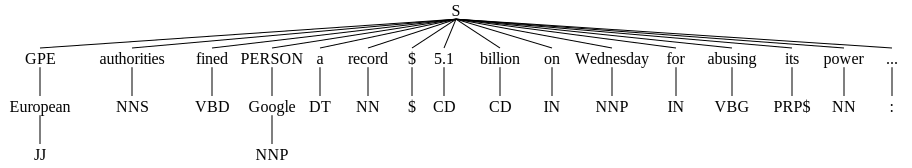

In [9]:
# NLTK provides a classifier that has already been trained to recognize Named Entities.
text = "European authorities fined Google a record $5.1 billion on Wednesday for abusing its power..."

import nltk
nltk.download('maxent_ne_chunker')
nltk.download('words')

nltk.ne_chunk(nltk.pos_tag(nltk.word_tokenize(text)))

In [10]:
# SpaCy features an extremely fast statistical entity recognition system, that assigns labels to contiguous spans of tokens

import spacy

nlp = spacy.load("en_core_web_sm")
doc = nlp(text)

for ent in doc.ents:
    print(ent.text, ent.label_)

European NORP
Google ORG
$5.1 billion MONEY
Wednesday DATE
